<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.930206,44.336492,59.046572,94.849705,-2.042182,303.120792,303.416045,-0.295253
1,0.0,1.0,60.876341,39.433734,24.417656,94.193049,-0.476109,228.444670,227.426352,1.018319
2,0.0,2.0,45.566953,97.241460,52.393561,80.331914,-15.858492,269.675396,286.541228,-16.865831
3,0.0,3.0,41.055663,47.511706,45.056075,85.216492,-0.811559,228.028377,230.133311,-2.104934
4,0.0,4.0,32.062710,69.550473,24.708911,52.183411,-5.548404,182.957101,188.937273,-5.980172
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.047671,91.857713,93.720479,32.946123,-1.093393,252.478593,252.663665,-0.185072
59996,999.0,56.0,95.712162,57.697531,95.679415,53.190400,6.609466,318.888974,321.593717,-2.704743
59997,999.0,57.0,25.601042,52.986224,59.321987,59.112512,-4.905468,202.116296,204.859793,-2.743497
59998,999.0,58.0,74.655973,65.040250,72.700784,57.902426,15.128221,295.427654,282.966047,12.461607


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.930206  44.336492  59.046572  94.849705  -2.042182   
      1.0    60.876341  39.433734  24.417656  94.193049  -0.476109   
      2.0    45.566953  97.241460  52.393561  80.331914 -15.858492   
      3.0    41.055663  47.511706  45.056075  85.216492  -0.811559   
      4.0    32.062710  69.550473  24.708911  52.183411  -5.548404   
...                ...        ...        ...        ...        ...   
999.0 55.0   25.047671  91.857713  93.720479  32.946123  -1.093393   
      56.0   95.712162  57.697531  95.679415  53.190400   6.609466   
      57.0   25.601042  52.986224  59.321987  59.112512  -4.905468   
      58.0   74.655973  65.040250  72.700784  57.902426  15.128221   
      59.0   88.160340  94.018430  43.838592  67.932954 -14.012076   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    303.120792  303.416045  -0.295253  
      1.0    228.444670  227.426352   1.018319  
      2.0    269.675396  286.541228 -16.865831  
      3.0    228.028377  230.133311  -2.104934  
      4.0    182.957101  188.937273  -5.980172  
...                 ...         ...        ...  
999.0 55.0   252.478593  252.663665  -0.185072  
      56.0   318.888974  321.593717  -2.704743  
      57.0   202.116296  204.859793  -2.743497  
      58.0   295.427654  282.966047  12.461607  
      59.0   289.938240  299.018619  -9.080379  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.930206  44.336492  59.046572  94.849705  -2.042182   
      1.0    60.876341  39.433734  24.417656  94.193049  -0.476109   
      2.0    45.566953  97.241460  52.393561  80.331914 -15.858492   
      3.0    41.055663  47.511706  45.056075  85.216492  -0.811559   
      4.0    32.062710  69.550473  24.708911  52.183411  -5.548404   
...                ...        ...        ...        ...        ...   
999.0 55.0   25.047671  91.857713  93.720479  32.946123  -1.093393   
      56.0   95.712162  57.697531  95.679415  53.190400   6.609466   
      57.0   25.601042  52.986224  59.321987  59.112512  -4.905468   
      58.0   74.655973  65.040250  72.700784  57.902426  15.128221   
      59.0   88.160340  94.018430  43.838592  67.932954 -14.012076   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    303.120792  303.416045  -0.295253  
      1.0    228.444670  227.426352   1.018319  
      2.0    269.675396  286.541228 -16.865831  
      3.0    228.028377  230.133311  -2.104934  
      4.0    182.957101  188.937273  -5.980172  
...                 ...         ...        ...  
999.0 55.0   252.478593  252.663665  -0.185072  
      56.0   318.888974  321.593717  -2.704743  
      57.0   202.116296  204.859793  -2.743497  
      58.0   295.427654  282.966047  12.461607  
      59.0   289.938240  299.018619  -9.080379  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,96.930206,44.336492,59.046572,94.849705,-2.042182,303.120792,303.416045,-0.295253
1,0.0,1.0,60.876341,39.433734,24.417656,94.193049,-0.476109,228.444670,227.426352,1.018319
2,0.0,2.0,45.566953,97.241460,52.393561,80.331914,-15.858492,269.675396,286.541228,-16.865831
3,0.0,3.0,41.055663,47.511706,45.056075,85.216492,-0.811559,228.028377,230.133311,-2.104934
4,0.0,4.0,32.062710,69.550473,24.708911,52.183411,-5.548404,182.957101,188.937273,-5.980172
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,25.047671,91.857713,93.720479,32.946123,-1.093393,252.478593,252.663665,-0.185072
59996,999.0,56.0,95.712162,57.697531,95.679415,53.190400,6.609466,318.888974,321.593717,-2.704743
59997,999.0,57.0,25.601042,52.986224,59.321987,59.112512,-4.905468,202.116296,204.859793,-2.743497
59998,999.0,58.0,74.655973,65.040250,72.700784,57.902426,15.128221,295.427654,282.966047,12.461607


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    96.930206  44.336492  59.046572  94.849705  -2.042182   
      1.0    60.876341  39.433734  24.417656  94.193049  -0.476109   
      2.0    45.566953  97.241460  52.393561  80.331914 -15.858492   
      3.0    41.055663  47.511706  45.056075  85.216492  -0.811559   
      4.0    32.062710  69.550473  24.708911  52.183411  -5.548404   
...                ...        ...        ...        ...        ...   
999.0 55.0   25.047671  91.857713  93.720479  32.946123  -1.093393   
      56.0   95.712162  57.697531  95.679415  53.190400   6.609466   
      57.0   25.601042  52.986224  59.321987  59.112512  -4.905468   
      58.0   74.655973  65.040250  72.700784  57.902426  15.128221   
      59.0   88.160340  94.018430  43.838592  67.932954 -14.012076   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    303.120792  303.416045  -0.295253  
      1.0    228.444670  227.426352   1.018319  
      2.0    269.675396  286.541228 -16.865831  
      3.0    228.028377  230.133311  -2.104934  
      4.0    182.957101  188.937273  -5.980172  
...                 ...         ...        ...  
999.0 55.0   252.478593  252.663665  -0.185072  
      56.0   318.888974  321.593717  -2.704743  
      57.0   202.116296  204.859793  -2.743497  
      58.0   295.427654  282.966047  12.461607  
      59.0   289.938240  299.018619  -9.080379  

[60000 rows x 8 columns]

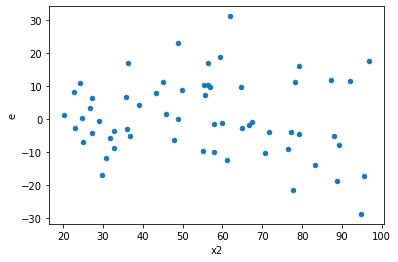

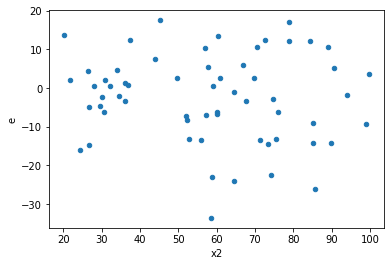

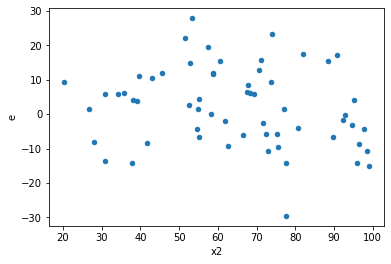

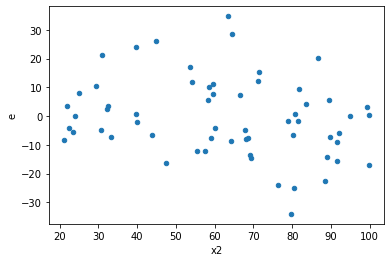

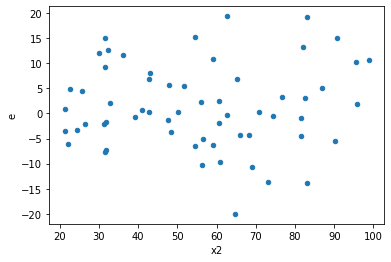

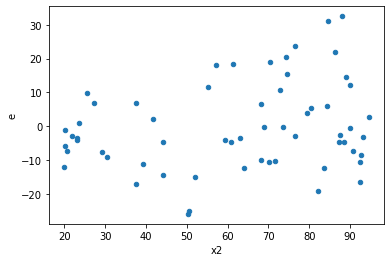

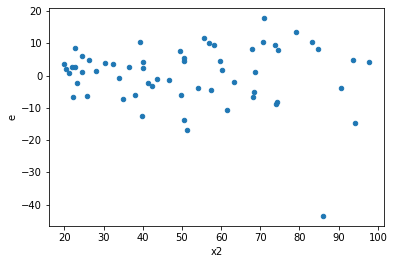

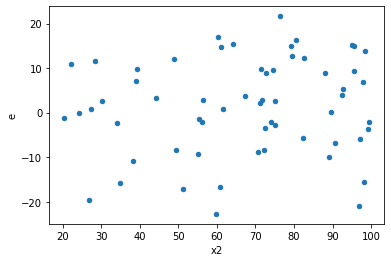

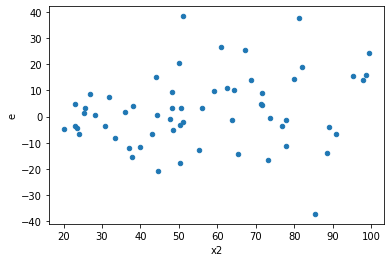

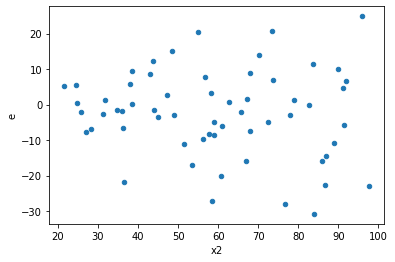

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,25.0,27.0,1953.6477931622103,2580.7817314023973,78.14591172648841,95.58450857045916,1.2231543078671352,0.6075657415223961,0.696217129238802,0.30378287076119803,Reject005=1 : Homoscedasticity
6.0,21.0,31.0,1678.8751144947626,2926.570573772457,79.94643402356012,94.40550237975668,1.1808594533676824,0.6602175500153988,0.6698912249923006,0.3301087750076994,Reject005=1 : Homoscedasticity
7.0,21.0,31.0,1321.7801901026305,4749.356482697379,62.941913814410974,153.2050478289477,2.434070376072206,0.023996903242790246,0.9880015483786049,0.011998451621395123,Reject005=0 : Heteroscedasticity
9.0,30.0,22.0,3649.314112253359,3286.046282991764,121.64380374177863,149.36574013598928,1.2278943566501574,0.625111272994471,0.6874443635027645,0.3125556364972355,Reject005=1 : Homoscedasticity
10.0,25.0,27.0,2981.303226689457,3662.799280642454,119.25212906757828,135.6592326163872,1.137583317606944,0.7410398028336376,0.6294800985831812,0.3705199014168188,Reject005=1 : Homoscedasticity
11.0,36.0,16.0,4626.5100353817015,2137.345387399572,128.5141676494917,133.58408671247324,1.039450273504546,0.9720064686604375,0.5139967656697813,0.48600323433021875,Reject005=1 : Homoscedasticity
15.0,22.0,30.0,2586.7061518090018,5321.424348726544,117.57755235495462,177.38081162421813,1.5086282038660201,0.29205713583049,0.853971432084755,0.146028567915245,Reject005=1 : Homoscedasticity
16.0,19.0,33.0,710.7089856109817,3693.4269490763436,37.40573608478851,111.9220287598892,2.992108710444643,0.005620401122442997,0.9971897994387785,0.0028102005612214986,Reject005=0 : Heteroscedasticity
19.0,31.0,21.0,2838.978472226364,4771.217881681493,91.57995071697948,227.20085150864253,2.480901657293839,0.03315129523456517,0.9834243523827174,0.016575647617282585,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,35.0,17.0,3518.2297422340043,1232.2243764884824,100.52084977811441,72.48378685226368,0.7210821139321982,0.40316798949587973,Reject005=1 : Homoscedasticity
1.0,25.0,27.0,4577.711285701651,3609.2680755924007,183.10845142806605,133.67659539231113,0.7300405543805597,0.4320436381100062,Reject005=1 : Homoscedasticity
2.0,30.0,22.0,4450.635800239503,1726.7142626965815,148.3545266746501,78.4870119407537,0.5290503343580488,0.10488883927288671,Reject005=1 : Homoscedasticity
3.0,27.0,25.0,4698.026281277794,2841.158927449824,174.00097338065902,113.64635709799296,0.6531363295846094,0.2806798709143593,Reject005=1 : Homoscedasticity
4.0,25.0,27.0,1953.6477931622103,2580.7817314023973,78.14591172648841,95.58450857045916,1.2231543078671352,0.6075657415223961,Reject005=1 : Homoscedasticity
5.0,23.0,29.0,4970.046975267901,2623.1511591488234,216.08899892469134,90.45348824651116,0.4185936752755974,0.035493486809170714,Reject005=0 : Heteroscedasticity
6.0,21.0,31.0,1678.8751144947626,2926.570573772457,79.94643402356012,94.40550237975668,1.1808594533676824,0.6602175500153988,Reject005=1 : Homoscedasticity
7.0,21.0,31.0,1321.7801901026305,4749.356482697379,62.941913814410974,153.2050478289477,2.434070376072206,0.023996903242790246,Reject005=0 : Heteroscedasticity
8.0,30.0,22.0,7338.158882619382,3773.6303487591617,244.60529608731272,171.52865221632553,0.7012466817361868,0.3619510188604224,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      808
Reject005=0 : Heteroscedasticity    192
Name: Result_test, dtype: int64